<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 3 </div>
<div style="text-align: right"> <font color='Gray'> Constanza Rivas Ortega </div>

    
***

## Modelo de Deffuant

El modelo de Deffuant es un modelo de dinámica de opinión al igual que el $\textit{voter model}$, pero con la particularidad de que las opiniones son continuas. Al igual que en los modelos discretos más simples, busca describir cuándo los individuos llegan a un consenso.

El grupo de individuos inicialmente tiene opiniones que pueden variar entre dos extremos sin ser necesariamente blanco o negro. Cuando dos individuos se juntan y discuten, las opiniones de ambos se acercan hasta un punto medio entre las dos opiniones. Esto pasa siempre y cuando las opiniones sean lo suficientemente similares, porque si son opiniones muy distintas entonces los individuos no discuten y se queda cada uno con su opinión inicial. La evolución temporal de las opiniones está dada por

$\delta \rho (x) = \frac{d^3}{2} \cdot \mu \cdot (\mu -1) \cdot \frac{\partial^2 \rho^2}{\partial x^2} $,

donde $d$ es el umbral de opinión y $\mu$ es el parámetro de convergencia. Los individuos discuten sus opiniones $x$ para llegar a un punto en común solamente cuando sus opiniones cumplen que $|x - x'| < d $.


## Simulacion

La simulación consta de una función con el modelo de Deffaunt en una sola dimensión, que luego es evaluada y graficada.

La condición inicial está dada de forma completamente aleatoria, con cada agente tomando una opinión entre 0 y 1 de forma continua. El algoritmo elige dos agentes al azar, compara su diferencia de opinión, y si es que son menores al umbral $d$ dado, cambia las opiniones de ambos agentes y las guarda en una lista. Para replicar las figuras del paper, se consideró que 1000 interacciones entre los agentes corresponden a 1 paso temporal, y se realizaron 50000 pasos temporales.

(La figura se demora un poco en cargar)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm.auto import tqdm


def deffuant_model(N,ts,inter,d,mu):
    '''
    INPUT
    N : numero de agentes
    ts : numero de pasos temporales
    inter : numero de interacciones que corresponden a un paso temporal
    d : umbral de opinion
    mu : parametro de convergencia

    '''
    
    # INICIO CONTADOR TEMPORAL
    tini = datetime.now()

    # CONDICION INICIAL
    agentes = list(np.random.uniform(0, 1, size=N)) # lista con agentes con opiniones aleatorias
    agentes_ts = [0]*(ts) # lista que guardara el sistema en todos los pasos temporales
    agentes_ts[0] = agentes.copy()
    
    interacciones = 0 # contador que lleva registro del numero de interacciones

    #ALGORITMO
    for t in tqdm(range(0,ts)):
        i, j = np.random.randint(N), np.random.randint(N) # elige dos agentes aleatoriamente
        if (np.abs(agentes[i]-agentes[j]) < d):
            agentes[i] = agentes[i] + mu*(agentes[j] - agentes[i])
            agentes[j] = agentes[j] + mu*(agentes[i] - agentes[j])
            
            interacciones += 1
            
        if interacciones >= inter:
            interacciones = 0
            agentes_ts[t] = agentes.copy()
        else:
            agentes_ts[t] = agentes.copy()
        
    # FIN CONTADOR TEMPORAL
    tfin = datetime.now()
    dtie = tfin - tini
    print('Tiempo ocupado (h:m:s:ns):', dtie)
    
    return agentes_ts

Simulación caso consenso


  0%|          | 0/50000 [00:00<?, ?it/s]

Tiempo ocupado (h:m:s:ns): 0:00:01.686469
------------------------
Simulación caso polarizado


  0%|          | 0/50000 [00:00<?, ?it/s]

Tiempo ocupado (h:m:s:ns): 0:00:01.756424


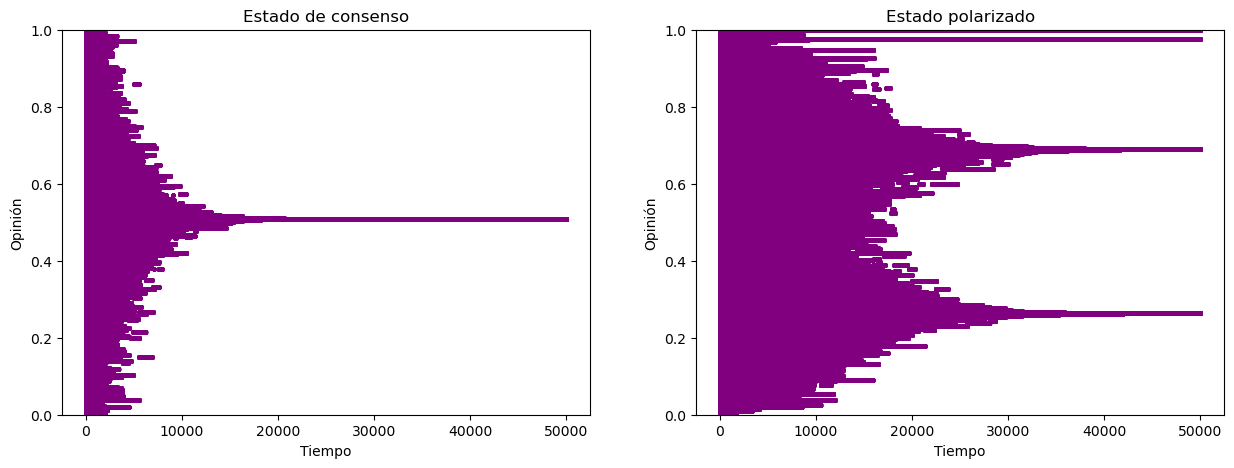

In [2]:
N = 1000
ts = 50000

print('Simulación caso consenso')
consenso = deffuant_model(N,ts,N,0.5,0.5)

print('------------------------')

print('Simulación caso polarizado')
polarizado = deffuant_model(N,ts,N,0.2,0.5)

tiempos = [[i]*N for i in range(ts)]

# CONFIGURACION FIGURA
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# FIGURA CONSENSO
ax1.set_ylim([0.0,1.0])
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Opinión")
ax1.set_title("Estado de consenso")
    
# FIGURA ESTADO POLARIZADO
ax2.set_ylim([0.0,1.0])
ax2.set_xlabel("Tiempo")
ax2.set_ylabel("Opinión")
ax2.set_title("Estado polarizado")

ax1.scatter(tiempos,consenso, s=5, color='purple')
ax2.scatter(tiempos,polarizado, s=5, color='purple')